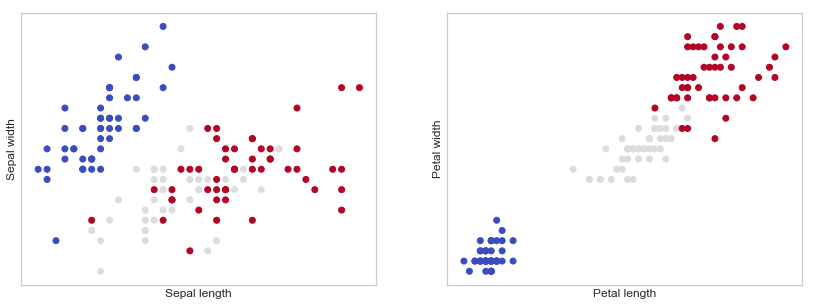

In [121]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from utils import *

dataset = load_iris()
X = dataset.data
y = dataset.target

plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xticks(())
plt.yticks(())
plt.show()

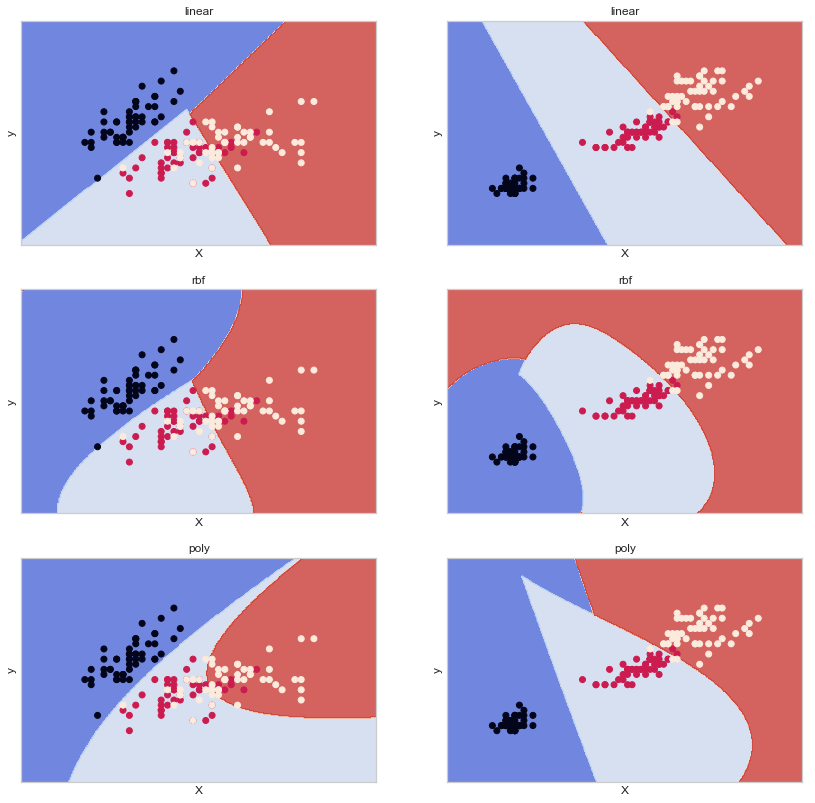

In [122]:
from sklearn.svm import SVC

plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(14, 14))

def viz(X, ker='linear'):
    global y
    
    h = .02

    clf = SVC(kernel=ker, C=1.)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(ker)
    
    
plt.subplot(3, 2, 1)
viz(dataset.data[:, :2])
plt.subplot(3, 2, 2)
viz(dataset.data[:, 2:])

plt.subplot(3, 2, 3)
viz(dataset.data[:, :2], 'rbf')
plt.subplot(3, 2, 4)
viz(dataset.data[:, 2:], 'rbf')

plt.subplot(3, 2, 5)
viz(dataset.data[:, :2], 'poly')
plt.subplot(3, 2, 6)
viz(dataset.data[:, 2:], 'poly')

plt.show()